In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

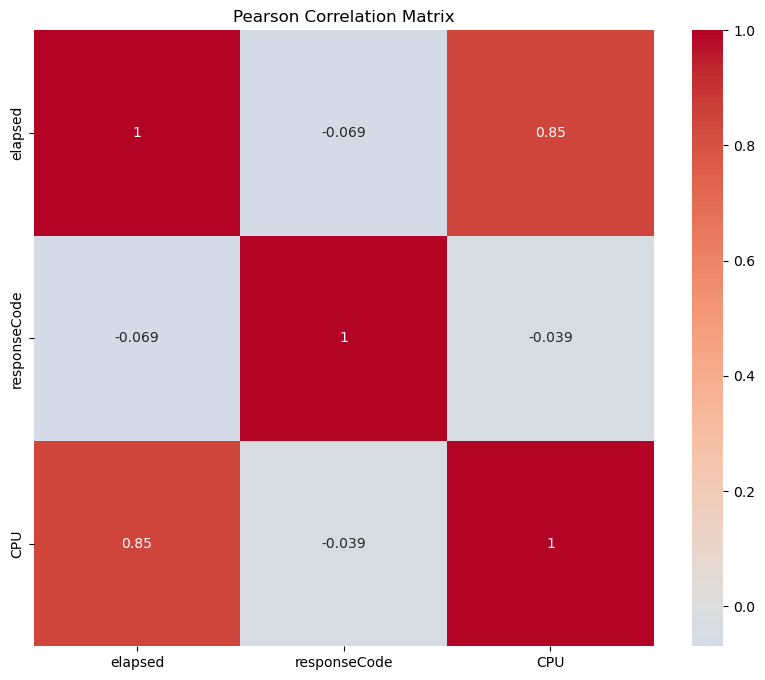

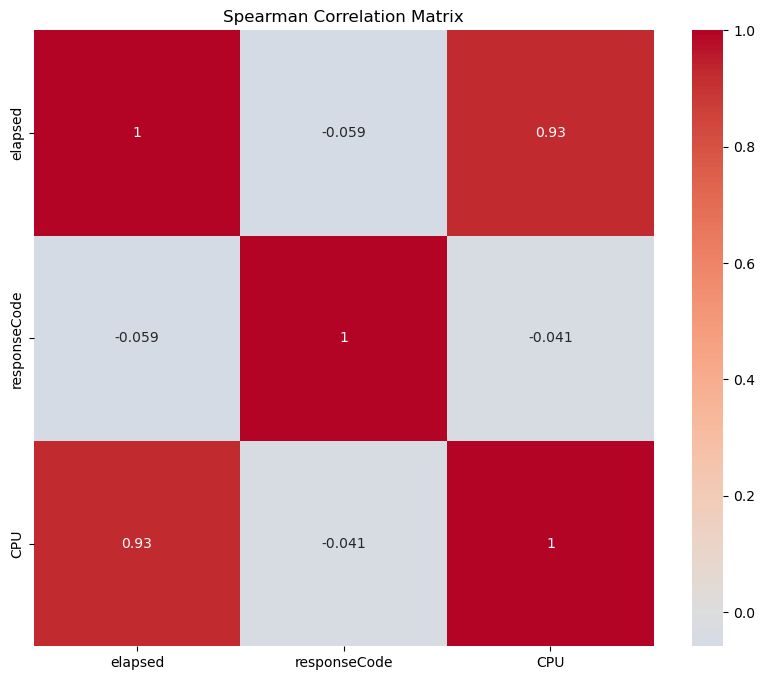

Top Pearson Correlations:
        level_0       level_1  correlation
2       elapsed           CPU     0.848579
5  responseCode           CPU    -0.039086
1       elapsed  responseCode    -0.069447
Top Spearman Correlations:
        level_0       level_1  correlation
2       elapsed           CPU     0.929436
5  responseCode           CPU    -0.040871
1       elapsed  responseCode    -0.058789


In [5]:
df = pd.read_csv('/Users/evgenii/Documents/generated_data.csv')

# Для анализа корреляции нас интересуют только числовые данные
numeric_cols = ['elapsed', 'responseCode','CPU']

# Матрица корреляций Пирсона
pearson_corr = df[numeric_cols].corr(method='pearson')

# Матрица корреляций Спирмена
spearman_corr = df[numeric_cols].corr(method='spearman')

# Визуализация тепловой карты для корреляции Пирсона
plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Pearson Correlation Matrix')
plt.show()

# Визуализация тепловой карты для корреляции Спирмена
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Spearman Correlation Matrix')
plt.show()

# Функция для нахождения пар с наибольшей корреляцией
def get_top_correlations(corr_matrix, num_pairs=5):
    corr_pairs = (
        corr_matrix.unstack()
        .reset_index()
        .rename(columns={0: 'correlation'})
        .query('level_0 != level_1')  # Убираем корреляцию переменной с самой собой
        .sort_values(by='correlation', ascending=False)
        .drop_duplicates(subset=['correlation'])
    )
    return corr_pairs.head(num_pairs)

# Топ 5 пар с наибольшей корреляцией для Пирсона
top_pearson = get_top_correlations(pearson_corr)
print("Top Pearson Correlations:")
print(top_pearson)

# Топ 5 пар с наибольшей корреляцией для Спирмена
top_spearman = get_top_correlations(spearman_corr)
print("Top Spearman Correlations:")
print(top_spearman)
